<a href="https://colab.research.google.com/github/Bluelord/Intro_to_ML_Python_Notes/blob/master/Supervised_Learning/Linear_Models_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Models**

### **Linear models for classification**

In [ ]:
pip install mglearn 

The formula for classification is similar to that of regression, but instead of returning weighted sum we threshold the value at zero. If the value less than 0 be predict it as class -1 or else we predict the class as +1. In classification, the *decision boundary* is a linear function of input, which can be a line for twtwo classes or hyperplan for multiclas.

The algorithms differ in two ways, how well $w$ & $b$ fits the training data and what kind of regularization is used. Two most common algorithms are *Logistic Regression* and *linear support vector machines* 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

The performance of classification is similar to that of regression in similar sinario like high dimentions large darapoitns etc, Both LR and SVC, by default uses L2 regularization. The parameter use for regularization is called **C**, this emphasis on finding a coefficient. Higher value of C can overfit the training data.

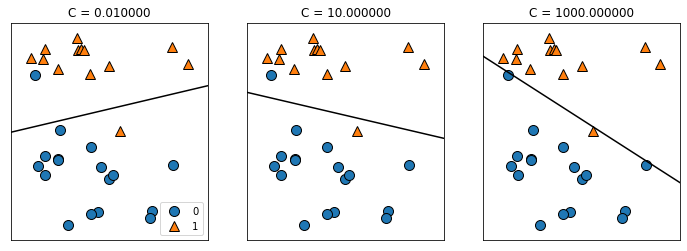

In [7]:
mglearn.plots.plot_linear_svc_regularization()

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=70)
logreg = LogisticRegression(solver ='liblinear',C = 1, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}" .format(
    logreg.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(logreg.score(X_test, y_test)) )

Training set score: 0.965
Test set score: 0.944


In [36]:
logreg100 = LogisticRegression(solver ='liblinear', C = 100, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}" .format(
    logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(
    logreg100.score(X_test, y_test)) )

Training set score: 0.981
Test set score: 0.937


In [37]:
logreg001 = LogisticRegression(solver ='liblinear', C = 0.01, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}" .format(
    logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(
    logreg001.score(X_test, y_test)) )

Training set score: 0.934
Test set score: 0.937


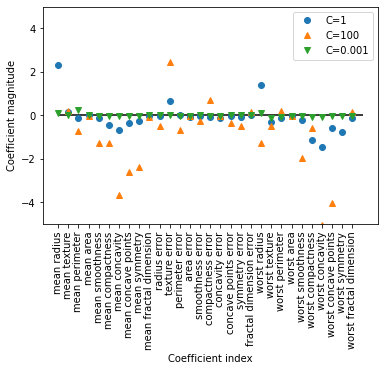

In [38]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(X.shape[1]), load_breast_cancer().feature_names, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

With C =1, accuracy of training & test are more or less same, it is more likely to be underfitted, on increasing the C value to 100 we get hight training accuracy which mean on hight C our model gets more complex and it should perform better. On redueasing the C to 0.01 our data gets more underfitted to the model.

Training accuracy of l1 logreg with C=0.001: 0.92
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.97
Test accuracy of l1 logreg with C=1.000: 0.94
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.97


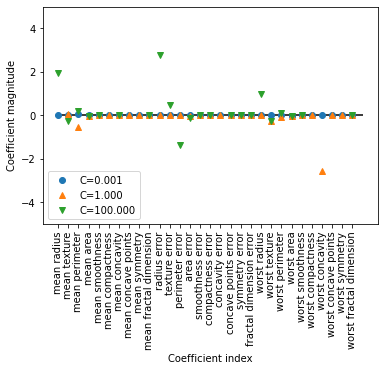

In [34]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(C=C, solver ='liblinear', penalty="l1").fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
      C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
      C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(X.shape[1]), load_breast_cancer().feature_names, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

### **Linear Model for multiclass classification**

Linear model don't extend naturally to multiclass calssification, it uses binary classification algorithm  one by one to all classes, which is also know as *one-vs-rest* approach. In this approach each class is tried to separate the class form all other remaining classes, and makes many binary classification at the test point the highest score on a single class is condidered to be its class.

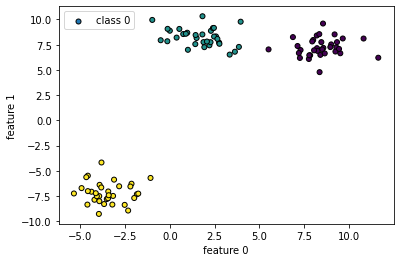

In [44]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, centers=3, random_state=70)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2" ])

In [50]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape (3,)


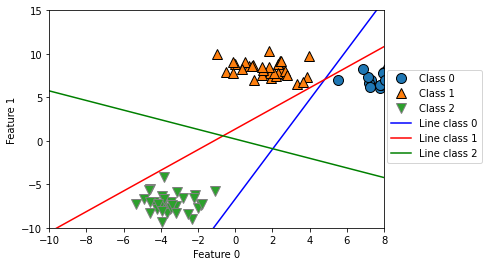

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))


Text(0, 0.5, 'Feature 1')

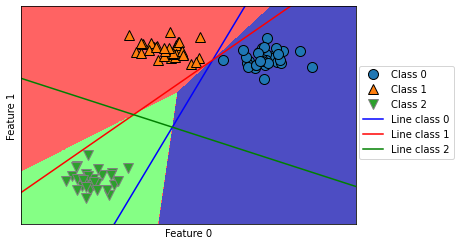

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Strengths, weaknesses and parameters

The main parameter of linear models regularization parameter, **alpha** for regression medels and **C** in LinearSVC and LogisticRegression. C & alpha are searched on lagarithmic scale, other regularizing parameter is how we panalize with L1 or L2, if only few of features are important then use L1 othrewise use by default L2 regularization.

Linear moedel are fast and easy to train, it works well on large dataset and spase data. If our datahas milions of samples we can use *solver='sag'* option in LogisticRegression and Ridge, which are faster than the default. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models